# **Aplicación de técnicas de machine learning para la predicción del riesgo de default de un cliente en una compañía de filipinas**

Realizado por: 

* Andrés Medina Báez       cc 1036654885
* Manuela Ramírez Quiceno  cc 1037657504

# 1.Introducción






Home Credit es una empresa de filipinas que busca ofrecer créditos a personas con antecedentes crediticios insuficientes o inexistentes, buscando la inclusión financiera de la población no bancarizada.

Para ello, esta compañía busca utilizar información transaccional y de telecomunicaciones, con el fin de predecir el riesgo de default de sus clientes.


**Principal Objetivo**: ¿Al cliente, le debo o no de otorgar el préstamo a partir de su riesgo de default? 


**Variable Objetivo**: Probabilidad de que el cliente presente retrasos en el pago de su cuota  (1) o no (0)

# 2.Importar librerias

Las librerías a usar en la carga de los datos son:



*   pandas: Para cargar los datos en dataframes.
*   numpy: Para operaciones con matrices, filas y/o columnas
*   matplotlib: Para graficar
*   os: Para interactuar con diferentes rutas
*plotly: Para graficar la matriz de correlación
*sklearn: Para hacer la separación de la data en train y test, y para los modelos de ML y las métricas de evaluación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 3.Cargar la Data

Se carga el archivo de salida del notebook 09-Preprocesamiento_Data_Elegida.ipynb

In [ ]:
data = pd.read_csv("06-DF_Final_60cols.csv",index_col=0) # Read data
data_original=data.copy()
data.head(5)

,TARGET,FLAG_OWN_CAR,CNT_CHILDREN,AMT_CREDIT_x,DAYS_BIRTH,MONTHS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PRODUCT_TYPE_walk-in,ind_vel_monto_cr,WALLSMATERIAL_MODE_DUROS,WALLSMATERIAL_MODE_ARMABLES,OCCUPATION_TYPE_BAJO,OCCUPATION_TYPE_MEDIO,OCCUPATION_TYPE_ALTO,indice_falta_pagar
0,1,0,0.0,406597.5,26.0,21.0,2,0.262949,1,1,...,0.0,1.0,0.0,1.000000,1,0,1,0,0,0.284122
1,0,0,0.0,1293502.5,46.0,40.0,1,0.622246,0,0,...,1.0,2.0,0.0,1.000000,1,0,0,1,0,0.000000
2,0,1,0.0,135000.0,52.0,8.0,2,0.555912,0,0,...,0.0,1.0,0.0,1.000000,0,0,1,0,0,0.000000
3,0,0,0.0,312682.5,52.0,101.0,2,0.650442,0,0,...,3.0,2.0,0.0,1.000000,0,0,1,0,0,0.000000
4,0,0,0.0,513000.0,55.0,101.0,2,0.322738,0,0,...,4.0,2.0,1.0,1.037038,0,0,0,1,0,0.000000


##### Revisa Carga de la Data

In [ ]:
Category=['TARGET','NAME_INCOME_TYPE_Businessman','NAME_INCOME_TYPE_Commercial associate',\
          'NAME_INCOME_TYPE_Others','NAME_INCOME_TYPE_Pensioner',\
          'NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Higher education',\
          'NAME_EDUCATION_TYPE_Incomplete higher','NAME_EDUCATION_TYPE_Lower secondary',\
          'NAME_EDUCATION_TYPE_Secondary / secondary special','NAME_HOUSING_TYPE_House / apartment',\
          'NAME_HOUSING_TYPE_Rented apartment','NAME_HOUSING_TYPE_With parents',\
          'FONDKAPREMONT_MODE_org spec account','FONDKAPREMONT_MODE_reg oper account',\
          'FONDKAPREMONT_MODE_reg oper spec account','HOUSETYPE_MODE_specific housing',\
          'WALLSMATERIAL_MODE_Others','WALLSMATERIAL_MODE_DUROS','WALLSMATERIAL_MODE_ARMABLES',\
          'OCCUPATION_TYPE_BAJO','OCCUPATION_TYPE_MEDIO','OCCUPATION_TYPE_ALTO',\
          'DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','CREDIT_TYPE_Microloan','CREDIT_TYPE_Mortgage',\
          'NAME_CLIENT_TYPE_New','FLAG_OWN_CAR','REGION_RATING_CLIENT_W_CITY',\
          'NAME_INCOME_TYPE_State servant','HOUSETYPE_MODE_block of flats']

Float=['CNT_CHILDREN','AMT_CREDIT_x','DAYS_BIRTH','MONTHS_EMPLOYED',\
       'EXT_SOURCE_2','DAYS_CREDIT',\
       'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE','CREDIT_ACTIVE_Active','CREDIT_ACTIVE_Closed',\
       'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Consumer credit',\
       'AMT_ANNUITY','RATE_DOWN_PAYMENT',\
       'AMT_DOWN_PAYMENT','CNT_PAYMENT','DAYS_DECISION','DAYS_FIRST_DRAWING',\
       'DAYS_TERMINATION','NAME_CONTRACT_STATUS_Approved',\
       'NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused',\
       'NAME_PORTFOLIO_Cards','NAME_PORTFOLIO_Cash',\
       'NAME_PORTFOLIO_POS','NAME_PRODUCT_TYPE_walk-in','ind_vel_monto_cr','indice_falta_pagar']


for i in Category: 
  data[i]=data[i].astype('category')

for i in Float: 
  data[i]=data[i].astype('float64')

In [ ]:
Cuantitativas=Float
Cualitativas=Category

In [ ]:
data.shape

(295221, 60)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295221 entries, 0 to 295236
Data columns (total 60 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   TARGET                                             295221 non-null  category
 1   FLAG_OWN_CAR                                       295221 non-null  category
 2   CNT_CHILDREN                                       295221 non-null  float64 
 3   AMT_CREDIT_x                                       295221 non-null  float64 
 4   DAYS_BIRTH                                         295221 non-null  float64 
 5   MONTHS_EMPLOYED                                    295221 non-null  float64 
 6   REGION_RATING_CLIENT_W_CITY                        295221 non-null  category
 7   EXT_SOURCE_2                                       295221 non-null  float64 
 8   DEF_30_CNT_SOCIAL_CIRCLE                           295221 non-nu

In [ ]:
data.isnull().sum().sum()

0

Escalamiento de las variables numéricas

In [ ]:
from sklearn.preprocessing import scale

X_scaled = scale(data[Cuantitativas])
X_Cuant=pd.DataFrame(X_scaled,columns=Cuantitativas)

X_Cuali=data[Cualitativas].copy()

In [ ]:
X_Cuali.shape,X_Cuant.shape

((295221, 32), (295221, 28))

In [ ]:
data_f = X_Cuant.join(X_Cuali)

In [ ]:
data=data_f.copy()

In [ ]:
data.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
data.isnull().sum().sum()

512

In [ ]:
data=data.dropna()
data.isnull().sum().sum()

0

# 4.Partición de la data en train y test

Teniendo en cuenta que nos estamos enfrentando a un problema de data desbalanceada, se realiza la partición garantizando un muestreo estratificado para la variable TARGET

In [ ]:
#Para data sin escalar y escalando
X = data.drop("TARGET", axis=1)
y= data["TARGET"]

In [ ]:
X.shape, y.shape

((295205, 59), (295205,))

## Split dataset 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =42, stratify=y)

In [ ]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f"Porcentaje de muestras positivas en el dataset de test={round(perc_test,4)} , y de test={round(perc_train,4)}")

Porcentaje de muestras positivas en el dataset de test=8.0757 , y de test=8.0753


# 5.Selección de la métrica de desempeño del modelo

Selección de la métrica de evaluación: 


En el reto de kaggle piden que la métrica de evaluación sea el área ROC.

# 6.Selección de Modelos

## 6.1. Modelar

Para esta iteración se modelará el problema con un modelo de regresión logística, un arbol de decisión, un naive bayes y un random forest.

### 6.1.1 Regresión Logistica

In [ ]:
rl=LogisticRegression(solver='liblinear')
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

### 6.1.2 Árbol de Decisión

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### 6.1.3 Naive Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### 6.1.4 SVM

In [ ]:
# from sklearn.svm import SVC
# svc = SVC(kernel='linear',random_state=0,probability=True) 
# svc.fit(X_train,y_train) 

### 6.1.5 Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
rfc.fit(X_train,y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### 6.1.4 Predicción del Modelo

In [ ]:
#Regresion
y_dtc_pred=dtc.predict(X_test)
y_rl_pred=rl.predict(X_test)
y_gnb_pred=gnb.predict(X_test)
# y_svc_pred=svc.predict(X_test)
y_rfc_pred=rfc.predict(X_test)

In [ ]:
### 2.1.4. Evaluación de los Modelos
print('Accuracy')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Score_entrenamiento:{round(dtc.score(X_train, y_train),4)},    & Score_validacion:{round(accuracy_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Score_entrenamiento:{round(rl.score(X_train, y_train),4)}, & Score_validacion:{round(accuracy_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Score_entrenamiento:{round(gnb.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_gnb_pred),4)}")
# print(f"Support Vector Machines  : Score_entrenamiento:{round(svc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Score_entrenamiento:{round(rfc.score(X_train, y_train),4)},  & Score_validacion:{round(accuracy_score(y_test,y_rfc_pred),4)}\n")

print('Recall')
print('-------------------------------------------------------------------------------------------------')
print(f"Decision Tree Classifier : Recall_validacion:{1-round(recall_score(y_test,y_dtc_pred),4)}")
print(f"Logistic Regresion       : Recall_validacion:{1-round(recall_score(y_test,y_rl_pred),4)}")
print(f"Naive Bayes              : Recall_validacion:{1-round(recall_score(y_test,y_gnb_pred),4)}")
# print(f"Support Vector Machines  : Recall_validacion:{1-round(recall_score(y_test,y_svc_pred),4)}")
print(f"Random Forest            : Recall_validacion:{1-round(recall_score(y_test,y_rfc_pred),4)}")


Accuracy
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Score_entrenamiento:1.0,    & Score_validacion:0.8454
Logistic Regresion       : Score_entrenamiento:0.9192, & Score_validacion:0.9192
Naive Bayes              : Score_entrenamiento:0.3842,  & Score_validacion:0.3822
Random Forest            : Score_entrenamiento:0.9831,  & Score_validacion:0.919

Recall
-------------------------------------------------------------------------------------------------
Decision Tree Classifier : Recall_validacion:0.889
Logistic Regresion       : Recall_validacion:1.0
Naive Bayes              : Recall_validacion:0.21450000000000002
Random Forest            : Recall_validacion:0.9992


In [ ]:
#Classification Report para los modelos 
print(f"Logistic Regresion  Results:\n" 
      f"{classification_report(y_test,y_rl_pred)}\n")

print(f"Naive Bayes Results:\n" 
      f"{classification_report(y_test,y_gnb_pred)}\n")

print(f"Decision tree Results:\n" 
      f"{classification_report(y_test,y_dtc_pred)}\n")

# print(f"Support Vector Machines:\n" 
      # f"{classification_report(y_test,y_svc_pred)}\n")

print(f"Random Forest:\n" 
      f"{classification_report(y_test,y_rfc_pred)}\n")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regresion  Results:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81410
           1       0.00      0.00      0.00      7152

    accuracy                           0.92     88562
   macro avg       0.46      0.50      0.48     88562
weighted avg       0.85      0.92      0.88     88562


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51     81410
           1       0.10      0.79      0.17      7152

    accuracy                           0.38     88562
   macro avg       0.52      0.57      0.34     88562
weighted avg       0.88      0.38      0.48     88562


Decision tree Results:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     81410
           1       0.10      0.11      0.10      7152

    accuracy                           0.85     88562
   macro avg       0.51      0.51      0.51     88562

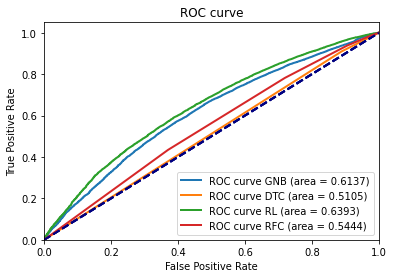

In [ ]:
labels=['Naive Bayes','Decision tree','Logistic Regresion',\
        # 'Support Vector Machines',
        'Random Forest']
fpr =[]
tpr = []
mod=''

#Complete el código
for i in range(len(labels)):
  fpr.append(0)
  tpr.append(0)
  if i==0:
    y_pred2 = gnb.predict_proba(X_test)
    mod='GNB'
  elif i==1:
    y_pred2 = dtc.predict_proba(X_test)
    mod='DTC'
  elif i==2:
    y_pred2 = rl.predict_proba(X_test)
    mod='RL'
  # elif i==3:
    # y_pred2 = svc.predict_proba(X_test)
    # mod='SVM'
  else:
    y_pred2 = rfc.predict_proba(X_test)
    mod='RFC'
  score = y_pred2[:,0]-y_pred2[:,1]
  fpr[i], tpr[i],_ = roc_curve(y_test,score)
  roc_auc = 1 - auc(fpr[i], tpr[i])
  plt.plot(tpr[i],fpr[i],lw=2, label='ROC curve {} (area = {})'.format(mod,round(roc_auc,4)))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc="lower right")
  plt.grid()
plt.show()

# 7.Evaluación sobre el conjunto de Test 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


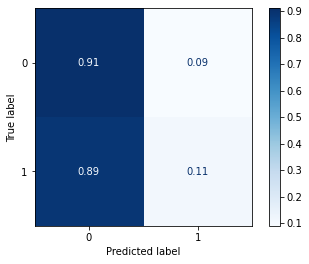

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test,cmap=plt.cm.Blues,normalize='true');

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_dtc_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.11101789709172259

Curva ROC


In [ ]:
y_pred2=gnb.predict_proba(X_test)

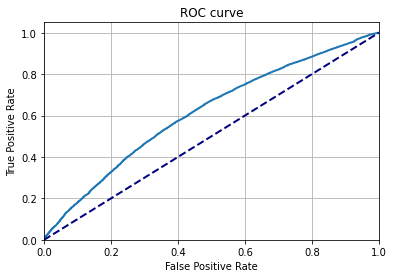

ROC curve Naive Bayes (area = 0.6137)


In [ ]:
fpr =[]
tpr = []
fpr.append(0)
tpr.append(0)
score = y_pred2[:,0]-y_pred2[:,1]
fpr, tpr,_ = roc_curve(y_test,score)
roc_auc = 1 - auc(fpr, tpr)
plt.plot(tpr,fpr,lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()
plt.show()
print('ROC curve Naive Bayes (area = {})'.format(round(roc_auc,4)))
